# State Farm Classification Project: Model 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats

In [2]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [3]:
train = pd.read_csv("exercise_02_train.csv")

# Basic EDA

In [4]:
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9DCFE7E80>,
      dtype=object)

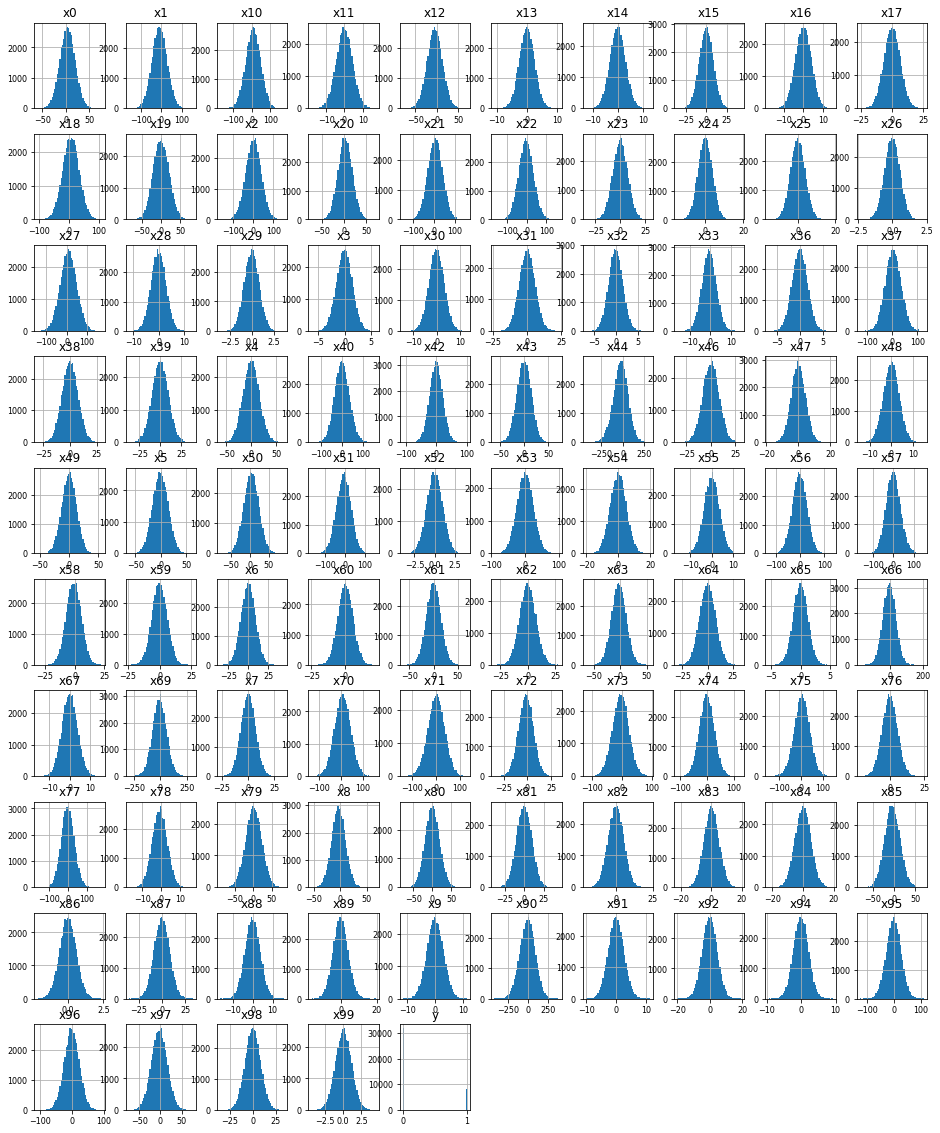

In [5]:
train.hist(figsize = (16,20),bins = 50,xlabelsize = 8,ylabelsize = 8)

In [6]:
numericCols = train.select_dtypes(include='number').columns

In [7]:
a = train[numericCols[0]]
type(a)

pandas.core.series.Series

In [8]:
stats.shapiro(train[numericCols[0]])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(nan, 1.0)

In [9]:
numericCols = train.select_dtypes(include='number').columns

for col in numericCols:
    x = train[col][train[col].notnull()]
    print(col + str(stats.normaltest(x)))
    print(col + str(stats.shapiro(x)))

x0NormaltestResult(statistic=3.3648448665002624, pvalue=0.18592304391988554)
x0(0.999951183795929, 0.77553391456604)
x1NormaltestResult(statistic=9.931982555773951, pvalue=0.006971037048111609)
x1(0.9998974800109863, 0.09808511286973953)
x2NormaltestResult(statistic=2.0646278414061485, pvalue=0.35618182978371005)
x2(0.9999645352363586, 0.9492587447166443)
x3NormaltestResult(statistic=4.970337649091086, pvalue=0.08331148830060463)
x3(0.9999280571937561, 0.3765951991081238)
x4NormaltestResult(statistic=2.6758353975022082, pvalue=0.2623914782158534)
x4(0.9999369382858276, 0.5200490951538086)
x5NormaltestResult(statistic=0.916938097199186, pvalue=0.6322508502709008)
x5(0.9999762177467346, 0.9969476461410522)
x6NormaltestResult(statistic=0.18958571768809673, pvalue=0.9095613225398562)
x6(0.9999591112136841, 0.893511176109314)
x7NormaltestResult(statistic=0.4346252733538616, pvalue=0.8046783580077453)
x7(0.9999579787254333, 0.8793933987617493)
x8NormaltestResult(statistic=4.372195648163559, 

x73NormaltestResult(statistic=12.798229535799036, pvalue=0.001663028788229024)
x73(0.9998441934585571, 0.007166378665715456)
x74NormaltestResult(statistic=5.165770165612004, pvalue=0.07555570480378043)
x74(0.9999316930770874, 0.432106614112854)
x75NormaltestResult(statistic=46.748645880121316, pvalue=7.057656690437136e-11)
x75(0.9996318221092224, 7.016416816441051e-07)
x76NormaltestResult(statistic=0.6039640500687298, pvalue=0.7393513545852815)
x76(0.9999634027481079, 0.9395273923873901)
x77NormaltestResult(statistic=23.12480537471577, pvalue=9.517268359545034e-06)
x77(0.9997953176498413, 0.0006810834165662527)
x78NormaltestResult(statistic=6.44311979032996, pvalue=0.039892781143971316)
x78(0.9998980760574341, 0.10088516026735306)
x79NormaltestResult(statistic=2.5713568336428243, pvalue=0.2764629628721197)
x79(0.9999377727508545, 0.5341927409172058)
x80NormaltestResult(statistic=30.77669286549077, pvalue=2.074560280498041e-07)
x80(0.9997609853744507, 0.00014095025835558772)
x81Normalte

In [10]:
train['x0'][train['x0'].notnull()]

0         0.198560
1       -29.662621
2        15.493759
3       -19.837651
4        11.896655
5        20.251771
6        21.713459
7        19.075180
8        12.791579
9        25.894806
10       31.008333
11      -26.686094
12       12.665618
13      -22.395842
14      -29.107336
15      -13.229554
16       -9.989111
17       20.033986
18        7.503362
19       14.694635
20        6.787312
21       -0.107519
22       20.650494
23       16.774194
24       11.099388
25       16.102159
26       14.195779
27       24.875979
28        5.321304
29       -8.951716
           ...    
39970   -13.186204
39971    -2.229370
39972    26.625694
39973    17.525808
39974   -14.640522
39975     4.788041
39976    26.986093
39977    -0.891323
39978    -4.767673
39979    21.453226
39980     0.107951
39981   -18.882412
39982    -8.113840
39983    16.433925
39984   -19.021690
39985    13.522088
39986    23.160224
39987    14.139405
39988   -34.040202
39989    45.346823
39990     1.532657
39991     3.

In [11]:
def unique(list1,getList = False): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x)
    if getList == True:
        return unique_list

unique(train.dtypes)

float64
object
int64


In [12]:
predictCols = list(train)
predictCols.remove('y')

In [13]:
for col in predictCols:
    if train[col].dtype in [np.float64,np.int64]:
        #print(col)
        train[col].fillna(train[col].mean(skipna = True), inplace=True)

In [14]:
# Ensure no remaining na's
numericCols = train.select_dtypes(include='number').columns
naVals = train[numericCols].isna().sum().sort_values()
naVals.sum()

0

In [15]:
objectCols = train.select_dtypes(include='object').columns
print(objectCols)

Index(['x34', 'x35', 'x41', 'x45', 'x68', 'x93'], dtype='object')


In [16]:
train.x34.fillna(train.x34.mode()[0], inplace=True)
uniqueX34_train = unique(train['x34'],True)

mercades
Toyota
ford
Honda
nissan
chevrolet
chrystler
volkswagon
tesla
bmw


In [17]:
train.x35.replace(['thurday', 'thur'], ['thursday','thursday'], inplace=True)
train.x35.replace(['wed'], ['wednesday'], inplace=True)
train.x35.replace(['fri'], ['friday'], inplace=True)
train.x35.fillna(train.x35.mode()[0], inplace=True)
unique(train['x35'])

monday
tuesday
wednesday
friday
thursday


In [18]:
# Convert currency column to float, remove nan's
train['x41'] = train['x41'].astype(str)
train['x41'] = train['x41'].map(lambda x: x.lstrip('$'))
train['x41'] = train['x41'].astype(np.float16)
train['x41'].fillna(0, inplace=True) # probably safer to replace nan's with 0, not mean

print(train['x41'].isna().sum())

0


In [19]:
# Convert percentage column to float, remove nan's
train['x45'] = train['x45'].astype(str)
train['x45'] = train['x45'].map(lambda x: x.rstrip('%'))
train['x45'] = train['x45'].astype(np.float16)
train['x45'].fillna(train['x45'].mean(skipna = True), inplace=True) # since very few unique values, ok to replace with mean

print(train['x41'].isna().sum())

0


In [20]:
# Month Column
train.x68.replace(['Dev'], ['Dec'], inplace=True) # because I'm OCD
train.x68.replace(['sept.'], ['Sep'], inplace=True)
train.x68.replace(['January'], ['Jan'], inplace=True)
train.x68.replace(['July'], ['Jul'], inplace=True)
train.x68.fillna(train.x68.mode()[0], inplace=True)

unique(train['x68'])

Jan
Nov
Jun
Dec
Feb
Oct
Mar
Jul
Apr
Sep
May
Aug


In [21]:
# Region
train.x93.replace(['euorpe'], ['europe'], inplace=True)
train = train[pd.isna(train['x93']) == False]
print(train['x93'].isna().sum())
# Region seems significant, and there's only 7 NA's, so remove rows with this as NA

0


In [22]:
# Check if target has na's
print(train['y'].isna().sum())

0


In [23]:
train = pd.get_dummies(train)

In [24]:
# Ensure we converted all non-numeric columns to numeric
train.select_dtypes(include='object').columns

Index([], dtype='object')

In [25]:
train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sep,x93_america,x93_asia,x93_europe
count,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,...,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000,39993.000000
mean,3.447752,-7.788416,1.704644,-0.072832,0.121980,-0.607009,0.035852,-0.052430,-2.911144,-0.024524,...,0.277199,0.231516,0.010777,0.119221,0.003776,0.022604,0.087140,0.078289,0.885555,0.036156
std,16.245334,37.012224,38.382930,1.503022,16.289301,15.583132,9.040667,6.952184,13.148182,2.939696,...,0.447621,0.421806,0.103252,0.324052,0.061331,0.148639,0.282044,0.268629,0.318355,0.186681
min,-60.113902,-157.341119,-163.339956,-6.276969,-61.632319,-62.808995,-35.060656,-26.736717,-53.735586,-11.497395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.595295,-32.731869,-24.141082,-1.087780,-10.896141,-11.181510,-6.089227,-4.746572,-11.722590,-2.003827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.446322,-7.987507,1.959477,-0.062721,0.105307,-0.576660,0.044975,-0.037833,-2.940961,-0.054184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.266326,16.848201,27.511371,0.940330,11.076726,9.954957,6.100325,4.636585,5.857648,1.954809,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,75.311659,153.469221,154.051060,5.837559,65.949709,63.424046,45.053946,34.267792,66.936936,11.271939,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Now check class imbalance

In [20]:
x = train.y.value_counts()
print(x)

print("% oF Training Set with Positives: " + "{0:.0%}".format(x[1] / (x[0] + x[1])))
print("% oF Training Set with Negatives: " + "{0:.0%}".format(x[0] / (x[0] + x[1])))


0    31851
1     8142
Name: y, dtype: int64
% oF Training Set with Positives: 20%
% oF Training Set with Negatives: 80%


### This class imbalance is not too bad, so we don't need to do resampling...

## Now check correlation

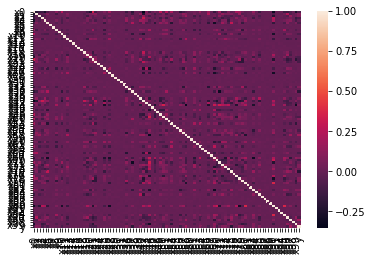

In [21]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = train[numericCols].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [22]:
# Attempt to find columns with high-correlation, and remove if necessary
for col in numericCols:
    #print("\n\n" + col)
    q = corr[col].sort_values(ascending = False)
    q = q.drop(col)
    q = q[abs(q) >= 0.5]
    perfectNames = q.index.values
    if len(q) > 0:
        print(col)

## Clearly, no columns in the data set are highly correlated, so no need to remove.

# Now can send to XGBoost

In [26]:
# Train test split
y = train.y
train = train.drop(['y'], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=.2, random_state=0)

In [28]:
dtrain = xgb.DMatrix(X_train)
dtest = xgb.DMatrix(X_test)

In [29]:
# First XGboost attempt, leaving most parameters as default
model = xgb.XGBClassifier(booster='gbtree',objective ='binary:logistic',max_depth = 5,
                          min_child_weight = 1,n_estimators = 500,seed = 1,n_jobs = 12)

model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=12, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=None, subsample=1,
       verbosity=1)

In [30]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [31]:
# evaluate predictions
#test_accuracy = accuracy_score(y_test, pred_test)
test_accuracy = roc_auc_score(y_test, pred_test)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 93.50%


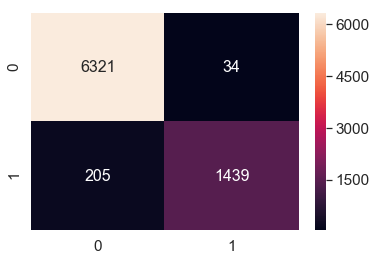

In [29]:
cm = confusion_matrix(y_test, pred_test)

sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, annot=True,fmt='g',annot_kws={"size": 16})# font size

### Many more false negatives than false postives...probably due to the class imbalance 0's to 1's in the training set heavily weighted toward 0's (80%)

In [46]:
# Tune max_depth and min_child_weight, since these have the highest impact on the model performance
param_test1 = {
 'max_depth':range(5,12,1),
 'min_child_weight':range(1,6,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(booster='gbtree',objective ='binary:logistic',max_depth = 10,
                          n_estimators = 500,seed = 1,n_jobs = 12), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=None, subsample=1,
       verbosity=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(5, 12), 'min_child_weight': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [47]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 8, 'min_child_weight': 4}, 0.9892715407729563)

In [44]:
# Tune max_depth and min_child_weight, since these have the highest impact on the model performance
param_test2 = {
 'n_estimators':range(100,600,100),
 'learning_rate':[0.07,0.08,0.09,0.1,0.11,0.12,0.13]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(booster='gbtree',objective ='binary:logistic',max_depth = 7,
                          min_child_weight = 1,n_estimators = 500,seed = 1,n_jobs = 4), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=None, subsample=1,
       verbosity=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(100, 600, 100), 'learning_rate': [0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [45]:
gsearch2.best_params_, gsearch2.best_score_

({'learning_rate': 0.1, 'n_estimators': 500}, 0.9892144265557844)

## Now attempt to understand feature importance

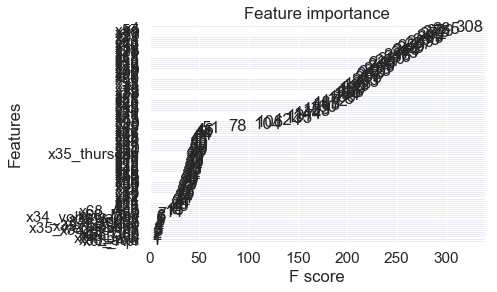

In [30]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [31]:
columns = model.get_booster().get_score(importance_type="gain")

In [32]:
dframe = pd.DataFrame([columns])
dframe = dframe.T
dframe.index.names = ['Feature Name']
dframe.columns = ['Importance']
dframe.sort_values(['Importance'],ascending = False)

,Importance
Feature Name,
x75,34.724857
x97,32.805042
x37,28.269208
x35_thursday,24.789958
x58,24.267436
x41,23.591614
x53,23.122496
x99,21.670210
x66,21.234005


In [37]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier(booster='gbtree',objective = 'binary:logistic',max_depth = 7,
                          min_child_weight = 1,n_estimators = 500,seed = 1,n_jobs = 12,
                          learning_rate = 0.1)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = roc_auc_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.000, n=126, Accuracy: 97.90%
Thresh=0.001, n=113, Accuracy: 97.91%
Thresh=0.001, n=112, Accuracy: 97.85%
Thresh=0.001, n=111, Accuracy: 97.90%
Thresh=0.001, n=110, Accuracy: 97.90%
Thresh=0.001, n=109, Accuracy: 97.81%
Thresh=0.001, n=108, Accuracy: 97.72%
Thresh=0.001, n=107, Accuracy: 98.05%
Thresh=0.001, n=106, Accuracy: 98.05%
Thresh=0.001, n=105, Accuracy: 97.84%
Thresh=0.002, n=104, Accuracy: 97.90%
Thresh=0.002, n=103, Accuracy: 97.86%
Thresh=0.002, n=102, Accuracy: 97.90%
Thresh=0.002, n=101, Accuracy: 97.87%
Thresh=0.002

### This shows that only a few features (<30) are really being used in the trees, and we can probably reduce the required dataset for this model considerably.

## Finally, pre-proccess the test set, and calculate the final prediction

In [33]:
test = pd.read_csv("exercise_02_test.csv")

In [34]:
len(test.index)

10000

In [35]:
predictCols = list(test)
for col in predictCols:
    if test[col].dtype in [np.float64,np.int64]:
        test[col].fillna(test[col].mean(skipna = True), inplace=True)

In [36]:
# Ensure all values in test.34 are in train.34 - i.e. no alternate spellings
any(elem in unique(test.x34,True)  for elem in uniqueX34_train)

bmw
Toyota
volkswagon
tesla
ford
nan
Honda
chrystler
mercades
chevrolet
nissan


True

In [37]:
# Output is true, so all values in test.X34 are a subset of train.x34

In [38]:
unique(test.x35)

test.x35.replace(['thurday', 'thur'], ['thursday','thursday'], inplace=True)
test.x35.replace(['wed'], ['wednesday'], inplace=True)
test.x35.replace(['fri'], ['friday'], inplace=True)
test.x35.fillna(test.x35.mode()[0], inplace=True)

tuesday
fri
wed
monday
thurday
friday
wednesday
thur


In [39]:
# Convert currency column to float, remove nan's
test['x41'] = test['x41'].astype(str)
test['x41'] = test['x41'].map(lambda x: x.lstrip('$'))
test['x41'] = test['x41'].astype(np.float16)
test['x41'].fillna(0, inplace=True) # probably safer to replace nan's with 0, not mean

In [40]:
# Convert percentage column to float, remove nan's
test['x45'] = test['x45'].astype(str)
test['x45'] = test['x45'].map(lambda x: x.rstrip('%'))
test['x45'] = test['x45'].astype(np.float16)
test['x45'].fillna(train['x45'].mean(skipna = True), inplace=True) # since very few unique values, ok to replace with mean

In [41]:
unique(test.x68)

# Month Column
test.x68.replace(['Dev'], ['Dec'], inplace=True) # because I'm OCD
test.x68.replace(['sept.'], ['Sep'], inplace=True)
test.x68.replace(['January'], ['Jan'], inplace=True)
test.x68.replace(['July'], ['Jul'], inplace=True)
test.x68.fillna(test.x68.mode()[0], inplace=True)

nan
Jun
May
Feb
Aug
sept.
Oct
Mar
Dev
January
July
Nov
Apr


In [43]:
# Region
test.x93.replace(['euorpe'], ['europe'], inplace=True)
test.x93.fillna(test.x93.mode()[0], inplace=True)
print(test['x93'].isna().sum())

0


In [44]:
test = pd.get_dummies(test)

In [45]:
# Ensure all columns in test are also in train after the one-hot encoding
any(elem in list(test)  for elem in list(train))

True

## Now retrain the model with the final hyperparameters using the full training set

In [46]:
# First XGboost attempt, leaving most parameters as default
model = xgb.XGBClassifier(booster='gbtree',objective = 'binary:logistic',max_depth = 7,
                          min_child_weight = 1,n_estimators = 500,seed = 1,n_jobs = 12,
                          learning_rate = 0.1)

model.fit(train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=12, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=None, subsample=1,
       verbosity=1)

## Now generate the final test output

In [48]:
final_y = model.predict_proba(test) # return class probabilities

In [49]:
final_y = final_y[:,1] # return only the probability of the 1's class

In [50]:
np.savetxt("results1.csv", final_y, delimiter = ",")